<h1>Straight Line Linear Regression tests 1 and 2 with emcee</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from chain_analysis import contour_plot
import emcee
import itertools

plt.rcParams['figure.figsize']=(10,8)
plt.style.use('seaborn-whitegrid')

In [2]:
# Gaussian parameters for data set creation
x_mu = 0.5
x_sig = 0.25

<h2>Importing and Visualizing data sets</h2>

In [3]:
# Function to read the data
def read_str_data(name):
    tmp = np.loadtxt(name)
    x0, y0, x = tmp[:,0],tmp[:,1],tmp[:,2]
    y = x+1.0
    xerr = 0.01*(1+x)
    yerr = np.repeat(0.005,10)
    return x0, x, xerr, y0, y, yerr

In [4]:
x01, x1, xerr1, y01, y1, yerr1 = read_str_data('general_datasets/data_str_line_1.txt')
x02, x2, xerr2, y02, y2, yerr2 = read_str_data('general_datasets/data_str_line_2.txt')
x03, x3, xerr3, y03, y3, yerr3 = read_str_data('general_datasets/data_str_line_3.txt')
x04, x4, xerr4, y04, y4, yerr4 = read_str_data('general_datasets/data_str_line_4.txt')
x05, x5, xerr5, y05, y5, yerr5 = read_str_data('general_datasets/data_str_line_5.txt')

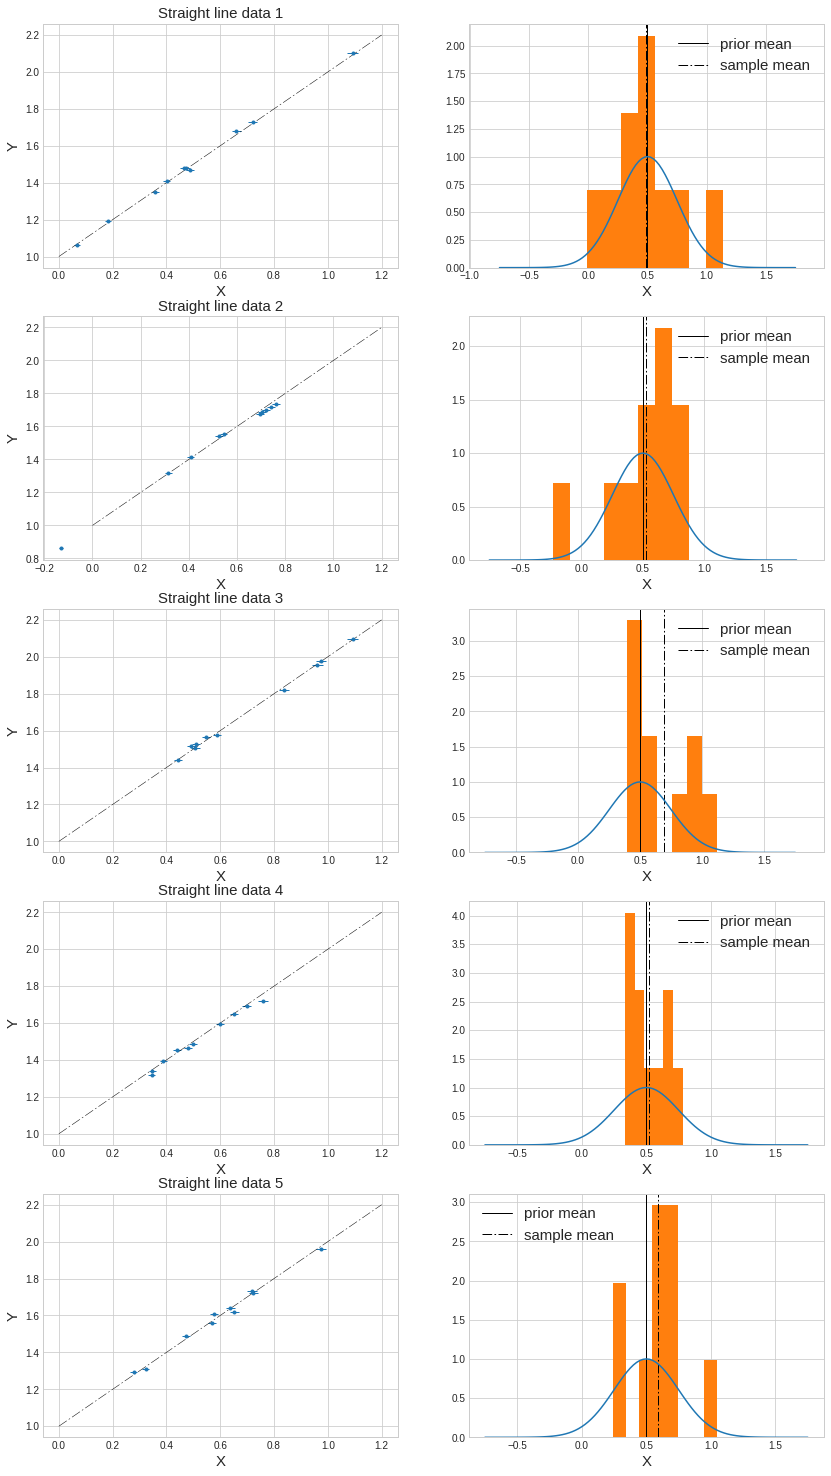

In [5]:
plt.figure(figsize=(14,26))

for i in range(5):
    plt.subplot(5,2,2*i+1)
    xx, xt, xe, yy, yt, ye = read_str_data('general_datasets/data_str_line_{}.txt'.format(i+1))
    plt.errorbar(x=xx, y=yy, xerr=xe, yerr=ye, marker='.',linestyle='',lw=1.0)
    plt.plot([0.0,1.2],[1.0,2.2],'k-.',lw=0.5)
    plt.title('Straight line data {}'.format(i+1),fontsize=15)
    plt.xlabel('X', fontsize=15)
    plt.ylabel('Y', fontsize=15)
    plt.subplot(5,2,2*i+2)
    plt.axvline(x_mu,lw=1.0,color='k')
    plt.axvline(xx.mean(),lw=1.0,color='k',linestyle='-.')
    plt.plot(np.linspace(x_mu-5*x_sig,x_mu+5*x_sig,101),
             np.exp(-(x_mu-np.linspace(x_mu-5*x_sig,x_mu+5*x_sig,101))**2/(2*x_sig**2)))
    _=plt.hist(xx,bins=np.linspace(xx.mean()-5*xx.std(),xx.mean()+5.0*xx.std(),20),normed=True)
    plt.legend(['prior mean','sample mean'],fontsize=15)
    plt.xlabel('X', fontsize=15)

<h2>Test1 : Gaussian prior, No hyperparameters, Analytic Marginalisation</h2>

In [6]:
def str_mcmc_xyerr(x0, xerr, y0, yerr, pos0,
                   n_walker=50, n_steps=2000, burn=100):

    x_mu = 0.5
    x_sig = 0.25    

    def lnlkl(p, x, xerr, y, yerr):
        y_model = p[0]*x + p[1]
        y_prior = p[0]*x_mu + p[1]
        C = (x_sig**2 + xerr**2)*yerr**2 + (p[0]*x_sig*xerr)**2
        numerator = ((x-x_mu)*yerr)**2 + ((y-y_model)*x_sig)**2 + ((y-y_prior)*xerr)**2
        return -0.5 * np.nansum(np.divide(numerator, C) + np.log(4*C*np.pi**2))

    # Prior on m
    def lnprior_m(m):
        if -10.0 < m < 10.0:
            return 0.0
        return -np.inf
    
    def lnprob(p, x, xerr, y, yerr):
        lpm = lnprior_m(p[0])
        if not np.isfinite(lpm):
            return -np.inf
        return lpm + lnlkl(p, x, xerr, y, yerr)

    ### Ensemble Method ###
    ndim=2

    sampler = emcee.EnsembleSampler(n_walker, ndim, lnprob, args=(x0,xerr,y0,yerr))
    pos,_,_=sampler.run_mcmc(pos0 = pos0 , N=burn)
    sampler.reset()
    _=sampler.run_mcmc(pos0 = pos , N=n_steps)
    
    return sampler

In [7]:
n_walker = 50
n_steps = 10000
burn = 1000
pos0 = np.c_[np.random.rand(n_walker)+0.5,np.random.rand(n_walker)+0.5]

sampler1 = str_mcmc_xyerr(x01, xerr1, y01, yerr1, pos0, n_walker, n_steps, burn)
sampler2 = str_mcmc_xyerr(x02, xerr2, y02, yerr2, pos0, n_walker, n_steps, burn)
sampler3 = str_mcmc_xyerr(x03, xerr3, y03, yerr3, pos0, n_walker, n_steps, burn)
sampler4 = str_mcmc_xyerr(x04, xerr4, y04, yerr4, pos0, n_walker, n_steps, burn)
sampler5 = str_mcmc_xyerr(x05, xerr5, y05, yerr5, pos0, n_walker, n_steps, burn)

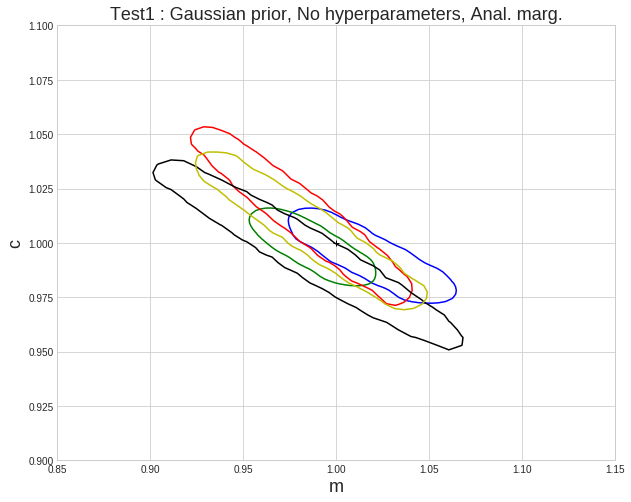

In [16]:
#plt.scatter(sampler1.chain[:,:,0].ravel(),sampler1.chain[:,:,1].ravel(),marker='+',color='b')
#plt.scatter(sampler2.chain[:,:,0].ravel(),sampler2.chain[:,:,1].ravel(),marker='+',color='g')
#plt.scatter(sampler3.chain[:,:,0].ravel(),sampler3.chain[:,:,1].ravel(),marker='+',color='r')
#plt.scatter(sampler4.chain[:,:,0].ravel(),sampler4.chain[:,:,1].ravel(),marker='+',color='k')
#plt.scatter(sampler5.chain[:,:,0].ravel(),sampler5.chain[:,:,1].ravel(),marker='+',color='y')

contour_plot.contour(sampler1.chain[:,:,:].reshape([n_walker*n_steps,2]), [0,1],
                     level=2, smooth=1e7, line=True, col='b')
contour_plot.contour(sampler2.chain[:,:,:].reshape([n_walker*n_steps,2]), [0,1],
                     level=2, smooth=1e7, line=True, col='g')
contour_plot.contour(sampler3.chain[:,:,:].reshape([n_walker*n_steps,2]), [0,1],
                     level=2, smooth=1e7, line=True, col='r')
contour_plot.contour(sampler4.chain[:,:,:].reshape([n_walker*n_steps,2]), [0,1],
                     level=2, smooth=1e7, line=True, col='k')
contour_plot.contour(sampler5.chain[:,:,:].reshape([n_walker*n_steps,2]), [0,1],
                     level=2, smooth=1e7, line=True, col='y')

plt.plot(1.0,1.0,'+k')
plt.xlim(0.85,1.15)
plt.ylim(0.90,1.10)
plt.xlabel('m',fontsize=18)
plt.ylabel('c',fontsize=18)
plt.title('Test1 : Gaussian prior, No hyperparameters, Anal. marg.',fontsize=18)

<h2>Test2 : Gaussian prior, Two hyperparameters, Analytic Marginalisation</h2>

In [17]:
def str_mcmc_xyerr_prior(x0, xerr, y0, yerr, pos0,
                         n_walker=50, n_steps=2000, burn=100):

    def lnlkl(p, x, xerr, y, yerr):
        y_model = p[0]*x + p[1]
        y_prior = p[0]*p[2] + p[1]
        C = (p[3]**2 + xerr**2)*yerr**2 + (p[0]*p[3]*xerr)**2
        numerator = ((x-p[2])*yerr)**2 + ((y-y_model)*p[3])**2 + ((y-y_prior)*xerr)**2
        return -0.5 * np.nansum(np.divide(numerator, C) + np.log(4*C*np.pi**2))

    # Prior to constrain the slope
    def lnprior_m(m):
        if -10.0 < m < 10.0:
            return 0.0
        return -np.inf
    
    # Prior on the standard deviation as it is positive
    def lnprior_s(s):
        if s>0.0:
            return 0.0
        return -np.inf
    
    def lnprob(p, x, xerr, y, yerr):
        lpm = lnprior_m(p[0])
        lps = lnprior_s(p[3])
        if not np.isfinite(lpm):
            return -np.inf
        return lpm + lps + lnlkl(p, x, xerr, y, yerr)

    ### Ensemble Method ###
    ndim=4
    
    sampler = emcee.EnsembleSampler(n_walker, ndim, lnprob, args=(x0,xerr,y0,yerr))
    pos,_,_=sampler.run_mcmc(pos0 = pos0 , N=burn)
    sampler.reset()
    _=sampler.run_mcmc(pos0 = pos , N=n_steps)
    
    return sampler

In [18]:
n_walker=50
n_steps = 10000
burn = 1000
pos0 = np.c_[np.random.rand(n_walker)+0.5, np.random.rand(n_walker)+0.5,
                 np.random.rand(n_walker)-0.5, np.random.rand(n_walker)]

sampler1p = str_mcmc_xyerr_prior(x01, xerr1, y01, yerr1, pos0, n_walker, n_steps, burn)
sampler2p = str_mcmc_xyerr_prior(x02, xerr2, y02, yerr2, pos0, n_walker, n_steps, burn)
sampler3p = str_mcmc_xyerr_prior(x03, xerr3, y03, yerr3, pos0, n_walker, n_steps, burn)
sampler4p = str_mcmc_xyerr_prior(x04, xerr4, y04, yerr4, pos0, n_walker, n_steps, burn)
sampler5p = str_mcmc_xyerr_prior(x05, xerr5, y05, yerr5, pos0, n_walker, n_steps, burn)

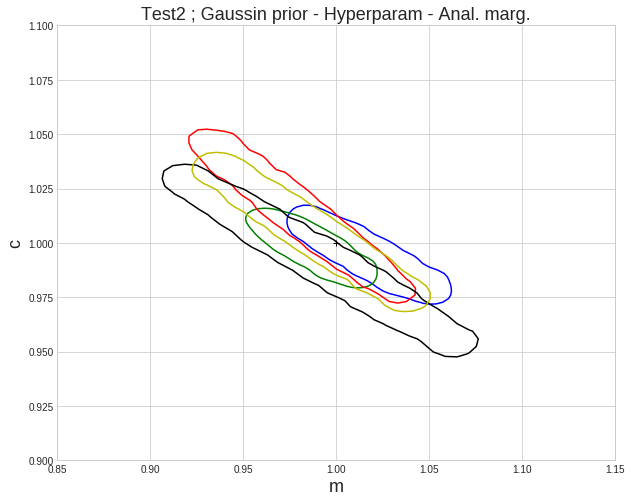

In [20]:
#plt.scatter(sampler1p.chain[:,:,0].ravel(),sampler1.chain[:,:,1].ravel(),marker='+',color='b')
#plt.scatter(sampler2p.chain[:,:,0].ravel(),sampler2.chain[:,:,1].ravel(),marker='+',color='g')
#plt.scatter(sampler3p.chain[:,:,0].ravel(),sampler3.chain[:,:,1].ravel(),marker='+',color='r')
#plt.scatter(sampler4p.chain[:,:,0].ravel(),sampler4.chain[:,:,1].ravel(),marker='+',color='k')
#plt.scatter(sampler5p.chain[:,:,0].ravel(),sampler5.chain[:,:,1].ravel(),marker='+',color='y')

contour_plot.contour(sampler1p.chain[:,:,:].reshape([n_walker*n_steps,4]), [0,1],
                     level=2, smooth=1e7, line=True, col='b')
contour_plot.contour(sampler2p.chain[:,:,:].reshape([n_walker*n_steps,4]), [0,1],
                     level=2, smooth=1e7,line=True, col='g')
contour_plot.contour(sampler3p.chain[:,:,:].reshape([n_walker*n_steps,4]), [0,1],
                     level=2, smooth=1e7,line=True, col='r')
contour_plot.contour(sampler4p.chain[:,:,:].reshape([n_walker*n_steps,4]), [0,1],
                     level=2, smooth=1e7,line=True, col='k')
contour_plot.contour(sampler5p.chain[:,:,:].reshape([n_walker*n_steps,4]), [0,1],
                     level=2, smooth=1e7,line=True, col='y')

plt.plot(1.0,1.0,'+k')
plt.xlim(0.85,1.15)
plt.ylim(0.90,1.10)
plt.xlabel('m',fontsize=18)
plt.ylabel('c',fontsize=18)
plt.title('Test2 ; Gaussin prior - Hyperparam - Anal. marg.',fontsize=18)

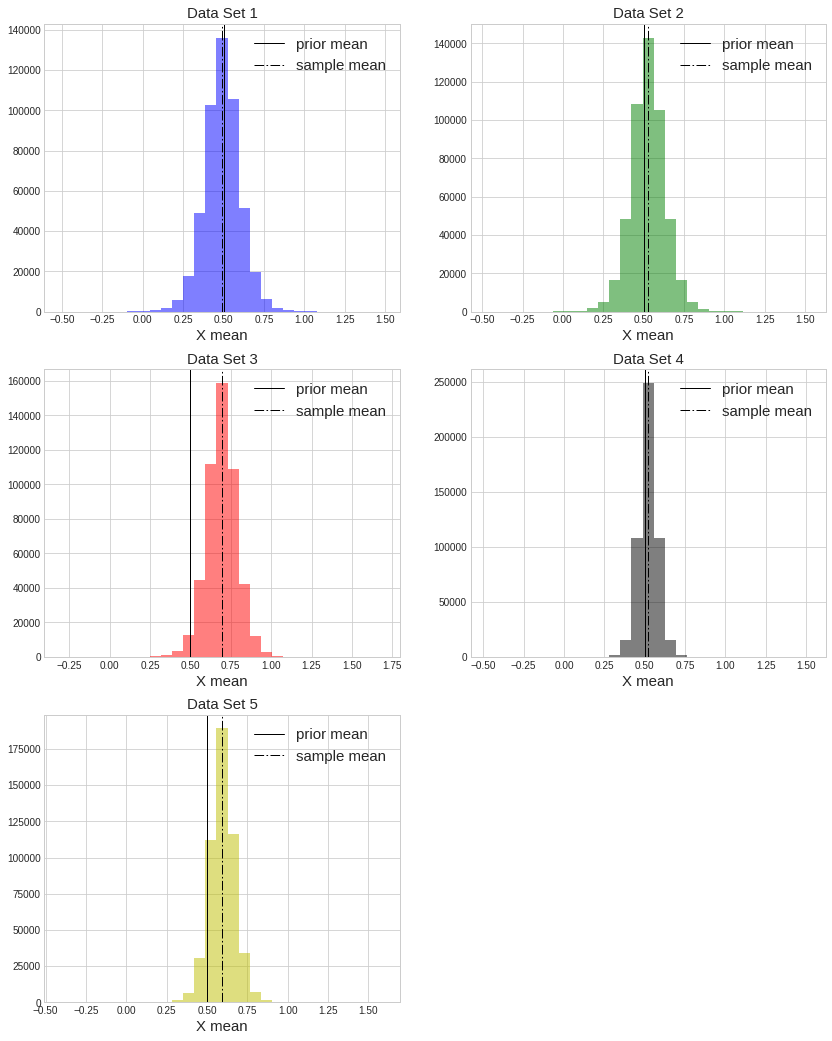

In [21]:
plt.figure(figsize=(14,18))

plt.subplot(3,2,1)
plt.axvline(x_mu,lw=1.0,color='k')
plt.axvline(x01.mean(),lw=1.0,color='k',linestyle='-.')
_ = plt.hist(sampler1p.chain[:,:,2].ravel(),bins=np.linspace(x01.mean()-1.0,x01.mean()+1.0,30),color='b',alpha=0.5)
plt.legend(['prior mean','sample mean'],fontsize=15)
plt.xlabel('X mean', fontsize=15)
plt.title('Data Set 1', fontsize=15)

plt.subplot(3,2,2)
plt.axvline(x_mu,lw=1.0,color='k')
plt.axvline(x02.mean(),lw=1.0,color='k',linestyle='-.')
_ = plt.hist(sampler2p.chain[:,:,2].ravel(),bins=np.linspace(x02.mean()-1.0,x02.mean()+1.0,30),color='g',alpha=0.5)
plt.legend(['prior mean','sample mean'],fontsize=15)
plt.xlabel('X mean', fontsize=15)
plt.title('Data Set 2', fontsize=15)

plt.subplot(3,2,3)
plt.axvline(x_mu,lw=1.0,color='k')
plt.axvline(x03.mean(),lw=1.0,color='k',linestyle='-.')
_ = plt.hist(sampler3p.chain[:,:,2].ravel(),bins=np.linspace(x03.mean()-1.0,x03.mean()+1.0,30),color='r',alpha=0.5)
plt.legend(['prior mean','sample mean'],fontsize=15)
plt.xlabel('X mean', fontsize=15)
plt.title('Data Set 3', fontsize=15)

plt.subplot(3,2,4)
plt.axvline(x_mu,lw=1.0,color='k')
plt.axvline(x04.mean(),lw=1.0,color='k',linestyle='-.')
_ = plt.hist(sampler4p.chain[:,:,2].ravel(),bins=np.linspace(x04.mean()-1.0,x04.mean()+1.0,30),color='k',alpha=0.5)
plt.legend(['prior mean','sample mean'],fontsize=15)
plt.xlabel('X mean', fontsize=15)
plt.title('Data Set 4', fontsize=15)

plt.subplot(3,2,5)
plt.axvline(x_mu,lw=1.0,color='k')
plt.axvline(x05.mean(),lw=1.0,color='k',linestyle='-.')
_ = plt.hist(sampler5p.chain[:,:,2].ravel(),bins=np.linspace(x05.mean()-1.0,x05.mean()+1.0,30),color='y',alpha=0.5)
plt.legend(['prior mean','sample mean'],fontsize=15)
plt.xlabel('X mean', fontsize=15)
plt.title('Data Set 5', fontsize=15)

<h3>Investigating the Log(Likelihood)</h3>

In [22]:
def lnlkl(p, x, xerr, y, yerr):
        y_model = p[0]*x + p[1]
        y_prior = p[0]*p[2] + p[1]
        C = (p[3]**2 + xerr**2)*yerr**2 + (p[0]*p[3]*xerr)**2
        numerator = ((x-p[2])*yerr)**2 + ((y-y_model)*p[3])**2 + ((y-y_prior)*xerr)**2
        return -0.5 * np.nansum(np.divide(numerator, C) + np.log(4*C*np.pi**2))

In [23]:
M,C = np.meshgrid(np.linspace(-10.0,10.0,101),np.linspace(-10.0,10.0,101))

lkl = []
for m,c in itertools.product(np.linspace(-10.0,10.0,101),np.linspace(-10.0,10.0,101)):
    p = [m,c,0.5,0.25]
    lkl.append(lnlkl(p,x01,xerr1,y01,yerr1))
    
lkl = np.asarray(lkl).reshape(101,101)

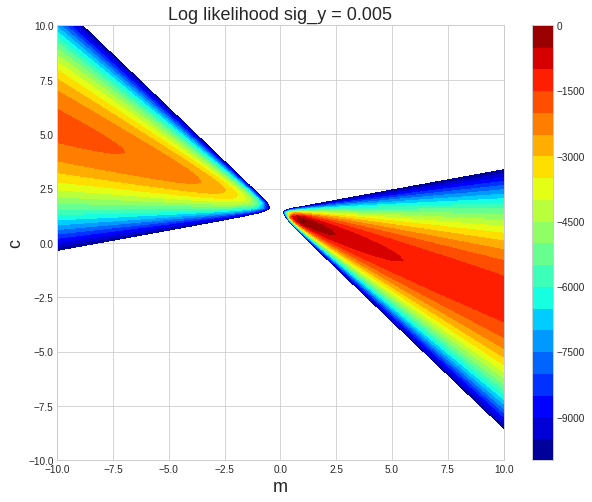

In [24]:
plt.contourf(M,C,lkl.T,levels=np.arange(-10000,10.0,500),cmap='jet')
plt.plot(1.0,1.0,'+k')
plt.grid('on')
plt.colorbar()
plt.xlabel('m',fontsize=18)
plt.ylabel('c',fontsize=18)
plt.title('Log likelihood sig_y = 0.005',fontsize=18)

In [25]:
M,C = np.meshgrid(np.linspace(-10.0,10.0,101),np.linspace(-10.0,10.0,101))

lkl2 = []
for m,c in itertools.product(np.linspace(-10.0,10.0,101),np.linspace(-10.0,10.0,101)):
    p = [m,c,0.5,0.25]
    lkl2.append(lnlkl(p,x01,xerr1,y01,yerr1*10.0))
    
lkl2 = np.asarray(lkl2).reshape(101,101)

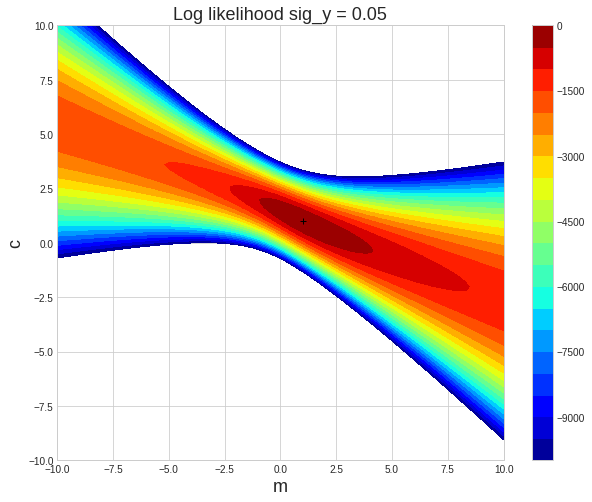

In [26]:
plt.contourf(M,C,lkl2.T,levels=np.arange(-10000,10.0,500),cmap='jet')
plt.plot(1.0,1.0,'+k')
plt.colorbar()
plt.grid('on')
plt.xlabel('m',fontsize=18)
plt.ylabel('c',fontsize=18)
plt.title('Log likelihood sig_y = 0.05',fontsize=18)